### <span style = 'color:green'>problem statement : detect credit card fraud transactions using Logistic Regression</span>

.


- Logistic Regression is a Machine Learning algorithm used to make predictions to find the value of a dependent variable such as the condition of a tumor (malignant or benign), classification of email (spam or not spam), or admission into a university (admitted or not admitted) by learning from independent variables (various features relevant to the problem).

**Difference between Logistic and Linear Regression**
The major difference between Logistic and Linear Regression is that Linear Regression is used to solve regression problems whereas Logistic Regression is used for classification problems.

**About the dataset**
- The dataset contains transactions made by credit cards in September 2013 by European cardholders.This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions



**Expected output**
- **Use histogram to represent to all the data**
- **Use Classification Report for scores**
- **Plot confusion matrix**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings      # ignore warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'creditcard.csv'
credit_df = pd.read_csv(path)

In [3]:
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_df.shape

(284807, 31)

In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### we have no missing value in our dataset

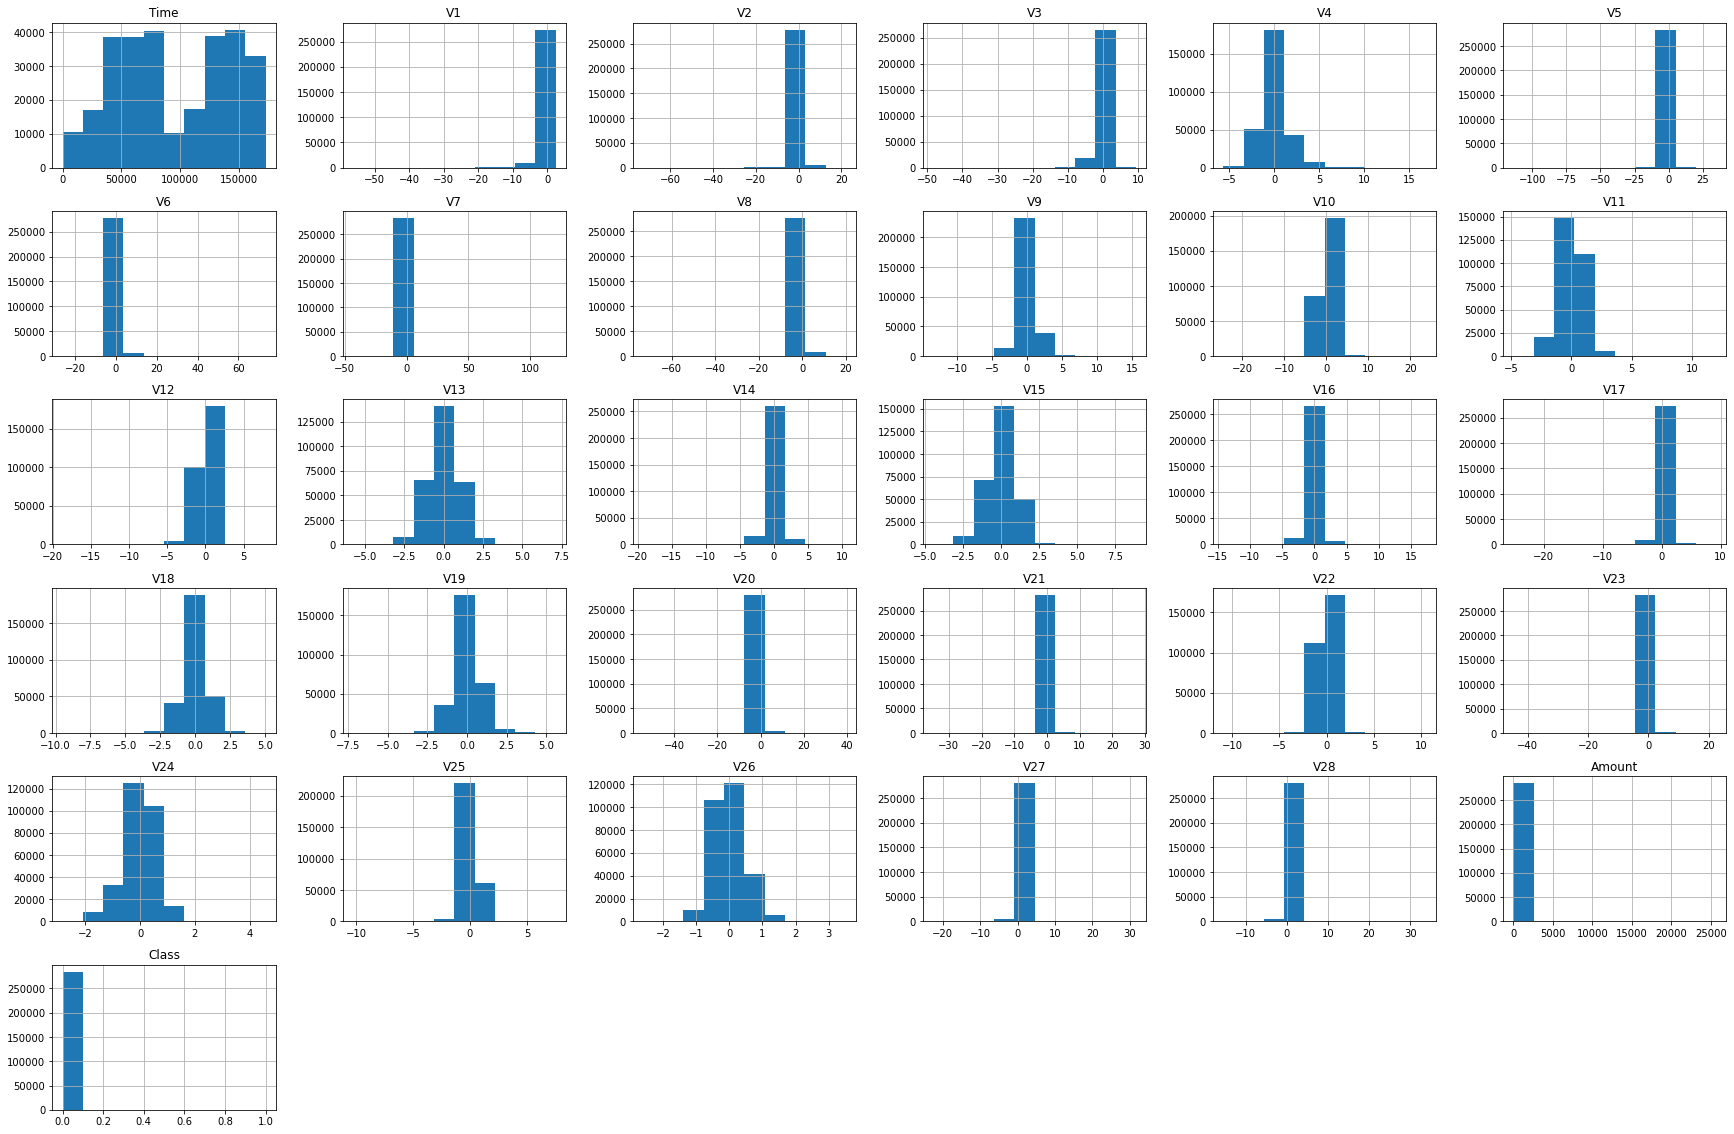

In [6]:

credit_df.hist(figsize=(30,20),)
plt.show()

Conclusions:<br>
    1-We can see V1 to V28 varibles are almost normally distributed<br>
    2-Class & Amount variables have most of data points at initial values or technically we can see right skew data<br>
    3-Time column have symmetric datapoints distribution

In [7]:
X = credit_df.drop(['Class'], axis = 1)
y = credit_df['Class']

# Splitting data - train, test, validation

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [9]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [10]:
lr.fit(X_train,y_train)

LogisticRegression()

In [11]:
# proportion of classes in train set

y_train.value_counts()/len(y_train)

0    0.998269
1    0.001731
Name: Class, dtype: float64

In [12]:
# proportion of classes in test set

y_test.value_counts()/len(y_test)

0    0.99828
1    0.00172
Name: Class, dtype: float64

In [13]:

print('Size of Test set', y_test.shape)
print('Size of Train set', y_train.shape)

Size of Test set (85443,)
Size of Train set (199364,)


No of Non Fraudulent Transactions:  199019
No of Fraudulent Transactions:  345


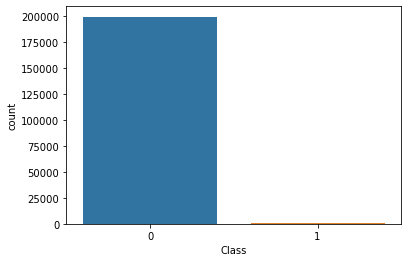

In [14]:
# Class imbalance

df = pd.concat([X_train, y_train], axis = 1)
print('No of Non Fraudulent Transactions: ', len(df.loc[df.Class == 0]))
print('No of Fraudulent Transactions: ', len(df.loc[df.Class == 1]))

sns.countplot(df.Class);

<AxesSubplot:>

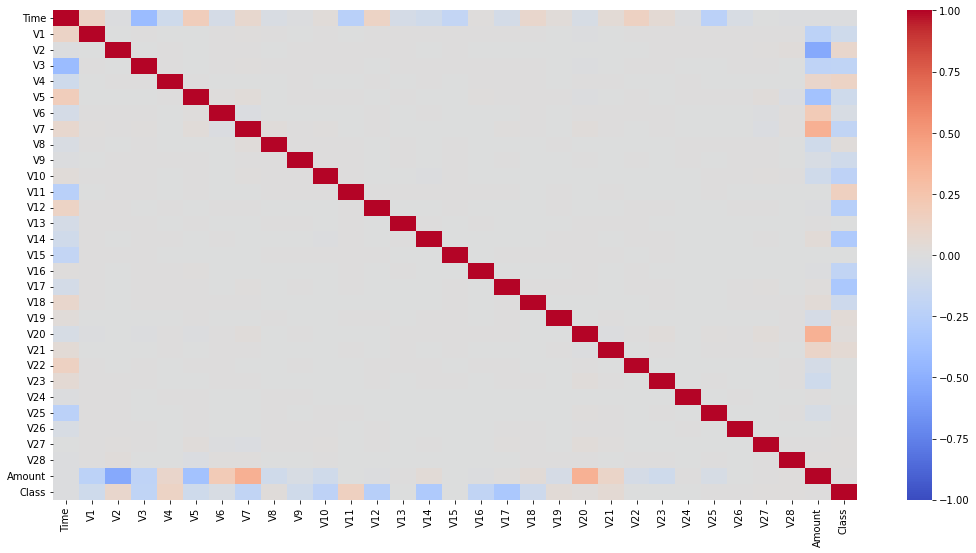

In [15]:
# plot correlation matrix

corr_matrix = df.corr()
plt.figure(figsize = (18, 9))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [16]:
# Correlations with labels

corr_matrix.Class.sort_values(ascending = False)

Class     1.000000
V11       0.151916
V4        0.131836
V2        0.093597
V21       0.050870
V19       0.033506
V8        0.019000
V20       0.018576
V28       0.011908
V27       0.008952
Amount    0.007345
V26       0.005064
V25       0.004653
V23      -0.002709
V22      -0.004362
V13      -0.004728
V15      -0.005374
V24      -0.006312
Time     -0.012819
V6       -0.042074
V9       -0.097618
V5       -0.102922
V1       -0.106077
V18      -0.113122
V7       -0.193559
V16      -0.194302
V3       -0.195881
V10      -0.214637
V12      -0.254208
V14      -0.299124
V17      -0.327707
Name: Class, dtype: float64

# Outliers

Note: We cannot remove every outliers, otherwise we'll loose some important data. so, we'll try to remove few of them from those features which are highly correlated with our labels.

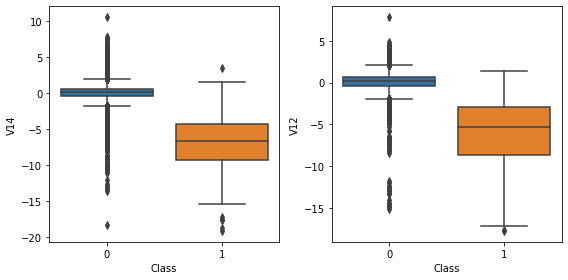

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4))

sns.boxplot(x = 'Class', y = 'V14', data = df, ax = ax1)
sns.boxplot(x = 'Class', y = 'V12', data = df, ax = ax2)

plt.tight_layout()

In [18]:
V14_fraud = df['V14'].loc[df['Class'] == 1]

q25, q75 = np.percentile(V14_fraud, 25), np.percentile(V14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {} \n'.format(q25, q75))

V14_iqr = q75 - q25
print('V14 IQR : {}\n'.format(V14_iqr))

cutoff = V14_iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff

outliers = [x for x in V14_fraud if x < lower or x > upper]
print('V14 Outliers: {}\n'.format(outliers))
print('No of Outliers for V14: {}\n'.format(len(outliers)))

df = df.drop(df[(df['V14'] > upper) | (df['V14'] < lower)].index)

print('-' * 127)
print()

V12_fraud = df['V12'].loc[df['Class'] == 1]

q25, q75 = np.percentile(V12_fraud, 25), np.percentile(V12_fraud, 75)
print('Quartile 25: {} | Quartile 75: {} \n'.format(q25, q75))

V12_iqr = q75 - q25
print('V12 IQR : {}\n'.format(V12_iqr))

cutoff = V12_iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff

outliers = [x for x in V12_fraud if x < lower or x > upper]
print('V12 Outliers: {}\n'.format(outliers))
print('No of Outliers for V12: {}\n'.format(len(outliers)))

df = df.drop(df[(df['V12'] > upper) | (df['V12'] < lower)].index)

Quartile 25: -9.37385858364976 | Quartile 75: -4.28925378244217 

V14 IQR : 5.08460480120759

V14 Outliers: [-18.8220867423816, -17.6206343516773, -19.2143254902614, -17.230202160711, -17.7216383537133, 3.44242199594215]

No of Outliers for V14: 6

-------------------------------------------------------------------------------------------------------------------------------

Quartile 25: -8.602907920541 | Quartile 75: -2.8861537488579 

V12 IQR : 5.7167541716831

V12 Outliers: [-17.1829184301947]

No of Outliers for V12: 1



In [19]:
# training set after removing outliers

X_train = df.drop(['Class'], axis = 1)
y_train = df['Class']

No of Non Fraudulent Transactions:  198705
No of Fraudulent Transactions:  338


<AxesSubplot:xlabel='Class', ylabel='count'>

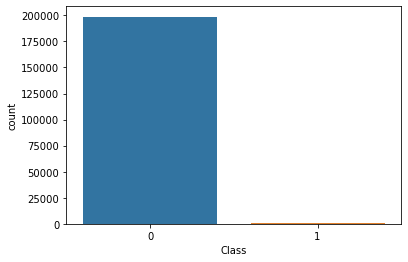

In [20]:
# Class imbalance

print('No of Non Fraudulent Transactions: ', len(df.loc[df.Class == 0]))
print('No of Fraudulent Transactions: ', len(df.loc[df.Class == 1]))

sns.countplot(df.Class)

In [26]:
y_pred=lr.predict(X_test)

In [27]:
# accuracy score
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)

In [28]:
score

0.8373067425067003

In [29]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     71433
           1       0.87      0.01      0.02     14010

    accuracy                           0.84     85443
   macro avg       0.85      0.50      0.46     85443
weighted avg       0.84      0.84      0.76     85443



In [33]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[71414, 13882],
       [   19,   128]], dtype=int64)

# Lets do feature scaling and apply fit the model again

In [31]:
# Feature Scaling 
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([
                       ('Scaler', RobustScaler(), ['Amount', 'Time'])], 
                        remainder = 'passthrough' 
                       )

X_train = ct.fit_transform(X_train)
X_test = ct.fit_transform(X_test)

ValueError: Specifying the columns using strings is only supported for pandas DataFrames